# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
requests.get(btc_url)
response_data_btc = requests.get(btc_url)

# Fetch current ETH price
eth_url = eth_url + "?format=json"
response_data = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

#Formatting as json
data_btc = response_data_btc.json()
data_eth = response_data_eth.json()

# Compute current value of my crpto
btc_price_usd = data_btc['data']['1']['quotes']['USD']['price']
eth_price_usd = data_eth['data']['1027']['quotes']['USD']['price']

my_btc_value = btc_price_usd * my_btc
my_eth_value = eth_price_usd * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13694.89
The current value of your 5.3 ETH is $2006.21


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_curr_closing = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Preview DataFrame
df_curr_closing

AGG                                       SPY  \
                            open    high      low   close   volume    open   
2020-10-14 00:00:00-04:00  118.1  118.11  117.985  118.04  3295967  350.75   

                                                             
                             high     low   close    volume  
2020-10-14 00:00:00-04:00  351.93  347.14  347.97  47281475

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_curr_closing.iloc[0]['AGG']['close']
spy_close_price = df_curr_closing.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Initialize data of lists
data = {'amount':[total_crypto_value, total_shares_value]}

df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,15701.101
shares,41006.500


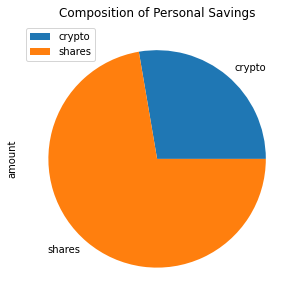

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(5, 5), title = 'Composition of Personal Savings')

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your goal of emergency fund")
else:
    dollars_away = emergency_fund - total_savings
    print(f"You require another ${dollars_away} to reach your goal of emergency fund")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007445,0.990999,0.988913,1.007135,0.996236,1.000521,1.001331,0.999377,0.989815,1.008319,...,1.010995,1.003844,0.998313,1.007880,1.010122,0.994477,0.997292,0.998873,1.016426,1.009018
2,1.014305,0.998487,1.006375,1.001885,0.987132,1.002523,0.986426,1.005081,0.988357,0.999315,...,1.003037,1.016217,0.994839,0.997265,1.014942,0.985034,1.001362,0.984476,1.013354,1.007200
3,1.021548,1.005439,1.016695,1.008697,0.988280,1.001136,0.991393,1.006348,0.990686,1.012157,...,1.004980,1.017323,1.007930,0.990790,1.006583,0.982840,0.997909,0.989117,1.012813,1.007528
4,1.023455,1.015014,1.012004,1.001434,0.986892,1.002883,0.988398,1.002232,1.006406,1.017984,...,1.008946,1.019615,1.011729,1.005840,1.004918,0.970163,0.992275,0.999554,1.010855,1.008811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.397510,3.250581,6.191852,14.313656,15.968806,6.422024,4.534255,11.125471,24.964195,15.153318,...,10.561547,12.626651,11.756549,6.646461,9.258576,6.710120,6.647184,12.275605,8.276015,8.298840
7557,6.329181,3.268544,6.243446,14.378071,16.108689,6.347525,4.544519,11.115975,24.745501,15.250737,...,10.547556,12.624000,11.734918,6.671251,9.359427,6.623434,6.606523,12.318174,8.310008,8.258738
7558,6.325080,3.248728,6.243346,14.215013,16.063261,6.382623,4.566440,11.014213,24.435502,15.323562,...,10.538279,12.664272,11.642221,6.662928,9.445177,6.652863,6.689846,12.283966,8.361765,8.258761
7559,6.287034,3.244147,6.231068,14.475522,16.144981,6.288748,4.553551,11.128607,24.564783,15.367542,...,10.594591,12.568663,11.556408,6.692929,9.338744,6.699806,6.648944,12.275965,8.364894,8.353117


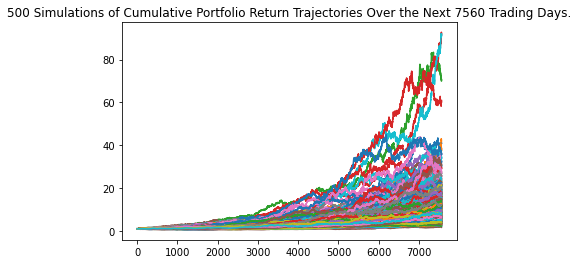

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyears_sim_plot.png", bbox_inches="tight")

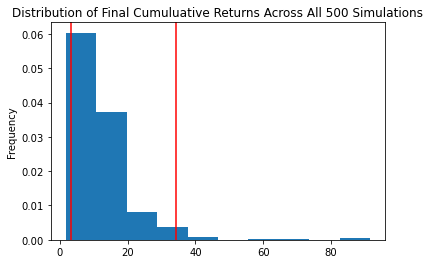

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyears_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.220745
std               9.364156
min               1.727149
25%               6.639674
50%               9.843313
75%              14.929214
max              91.561212
95% CI Lower      3.272409
95% CI Upper     34.387131
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65448.17 and $687742.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98172.26 and $1031613.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007363,1.009180,0.999407,1.000392,1.001275,1.004543,0.990965,0.994411,0.998774,1.009983,...,0.996404,1.003360,0.995982,1.003776,0.997451,1.000517,0.992426,1.018594,1.007112,1.003212
2,1.000761,1.002298,0.990960,1.011115,1.007480,0.990456,0.987053,0.990547,0.997751,0.998149,...,0.987879,0.997165,0.989526,0.988888,1.004500,1.006540,0.993363,1.024019,1.010109,0.993606
3,1.003493,0.995697,1.004162,1.018482,1.007825,0.984755,0.987110,0.990539,0.990737,1.005228,...,0.990417,1.002718,0.997248,0.987003,0.998242,1.007019,0.999064,1.004346,1.000849,0.987855
4,1.014395,0.990951,1.012147,1.023796,1.000647,0.985330,0.990666,0.988261,0.994503,1.005886,...,0.983490,1.000743,1.002064,0.978812,0.997543,1.010915,0.983344,1.014220,0.989433,0.982365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.290431,1.381586,1.309216,1.976123,1.466618,1.496671,1.860932,1.585828,2.055443,1.719146,...,1.060793,1.564870,1.754054,1.327855,1.463497,1.880921,2.492273,1.476385,2.135689,1.233091
1257,1.278811,1.382736,1.297108,1.960304,1.467193,1.493881,1.869565,1.602714,2.054927,1.729025,...,1.062188,1.559010,1.750255,1.319934,1.457091,1.888959,2.504635,1.461112,2.139070,1.232041
1258,1.286031,1.357265,1.303773,1.937369,1.450009,1.493809,1.870458,1.623804,2.049585,1.717207,...,1.055884,1.549637,1.751865,1.318891,1.471898,1.898776,2.533805,1.446367,2.171652,1.226299
1259,1.288601,1.345506,1.313368,1.937010,1.452906,1.521554,1.875299,1.617971,2.054221,1.710319,...,1.061517,1.543299,1.771183,1.320984,1.454395,1.869814,2.549322,1.456314,2.170079,1.231369


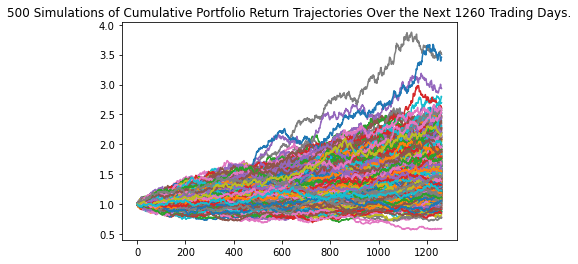

In [30]:
# Plot simulation outcomes
line_plot_five = MC_fiveyears.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_fiveyears_sim_plot.png", bbox_inches="tight")

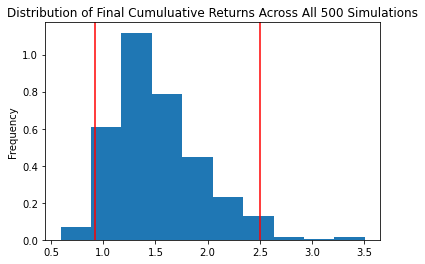

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyears.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_fiveyears_dist_plot.png',bbox_inches='tight')

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.519702
std               0.414873
min               0.591315
25%               1.231140
50%               1.446265
75%               1.739354
max               3.506674
95% CI Lower      0.919636
95% CI Upper      2.500401
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55178.17 and $150024.04


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000209,1.001548,0.983129,0.992156,1.001402,1.002977,0.996056,0.997219,0.993858,1.000462,...,0.989254,1.006796,0.988090,1.002448,1.004617,0.989445,0.996994,1.003691,0.984735,1.007481
2,1.003564,1.013129,0.979674,0.985867,0.999085,1.005287,0.979835,0.991185,0.995437,0.997833,...,1.000795,1.001990,0.992069,0.999992,1.000790,0.999062,1.002707,1.012352,0.981983,1.017246
3,1.009909,1.010561,0.973799,0.990408,0.991673,1.009276,0.982611,0.995394,0.998636,1.002414,...,1.003076,1.012609,0.991832,0.996478,0.995475,1.003807,1.007989,1.023562,0.982455,1.017179
4,1.008404,1.008812,0.975585,0.993233,0.999235,1.009674,0.967130,0.974816,1.003247,1.000342,...,1.015710,1.010676,0.998342,0.998179,0.988356,0.998387,1.003046,1.014029,0.985129,1.018271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.393455,0.981663,3.274607,1.880867,1.459423,2.654463,2.101317,1.958586,4.941734,2.786342,...,2.624805,2.231468,3.507489,2.704825,2.889931,1.062051,1.835510,3.934163,2.548153,4.944972
2517,2.398175,0.987011,3.285337,1.884223,1.466643,2.681051,2.098553,1.955860,4.918707,2.801748,...,2.645668,2.222664,3.511466,2.712621,2.886456,1.053482,1.862231,3.913755,2.537155,4.979543
2518,2.368930,0.985922,3.279037,1.865154,1.438609,2.660635,2.087341,1.946557,4.922084,2.829937,...,2.667747,2.235505,3.542404,2.704000,2.871102,1.045119,1.872387,3.889713,2.553614,5.012454
2519,2.369571,0.979059,3.271421,1.857236,1.428954,2.642178,2.098227,1.969536,4.872642,2.827287,...,2.667998,2.240740,3.557101,2.695254,2.853433,1.040695,1.852468,3.855510,2.553304,4.993497


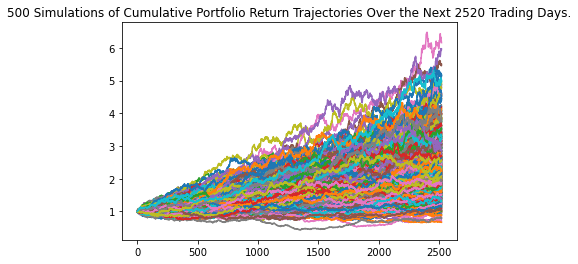

In [36]:
# Plot simulation outcomes
# Plot probability distribution and confidence intervals
line_plot_ten = MC_tenyears.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_tenyears_sim_plot.png", bbox_inches="tight")

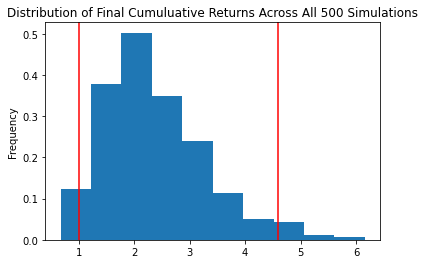

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyears.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_tenyears_dist_plot.png',bbox_inches='tight')

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.364939
std               0.924044
min               0.671889
25%               1.698378
50%               2.194371
75%               2.922339
max               6.157616
95% CI Lower      1.001537
95% CI Upper      4.595588
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl_five[8]*initial_investment,2)
ci_upper_ten = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $55178.17 and $150024.04
